In [73]:
from nimlab import datasets as nimds
from matplotlib import pyplot as plt
import numpy as np
from nilearn import image, plotting, maskers
import nibabel as nib
import os
import pandas as pd
from tqdm import tqdm

In [81]:
#User Input Below
#Path to the CSV with paths below
path_to_paths_csv = r"C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\functional_networks\file_paths\paths_to_positive_outcome_seeds_for_merge.csv"
name = r"merge_adnifwep_riosvox_positive_outcome"

In [75]:
#Preparing
paths_df = pd.read_csv(path_to_paths_csv)
print("I found", len(paths_df), "participants:")
paths_df.head()
print(paths_df.values)

I found 3 participants:
[['C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\merge_adni_fwep_unidirectional_positive.nii']
 ['C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\two_tail__tfce_tstat_uncp_c1_positive.nii']
 ['C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\two_tail__vox_tstat_uncp_c1_positive.nii']]


# OPTION A - use the below cell to merge two seeds that do not contain multiple signs per seed

In [82]:
mask = nimds.get_img("mni_icbm152")

def merge_function(matrix1, matrix2, mx1_val=1, mx2_val=-1, threshold=0, tails=2):
    '''This function will merge two matrices'''
    seed_matrix = np.zeros(matrix1.shape)
    if tails == 2:
        seed_matrix[matrix1>threshold] = mx1_val
        seed_matrix[matrix2>threshold] = mx2_val
        seed = 'two_tail_'
    else:
        seed_matrix[matrix1>threshold] = 1
        seed_matrix[matrix2>threshold] = 1
        seed = 'one_tail_'
    return seed_matrix, seed

seed_matrices = {}
paths = []
seed = ''
for index, data in paths_df.iterrows():
    path = data.values[0]
    img = image.load_img(path)
    img_matrix = img.get_fdata()
    img_matrix = np.nan_to_num(img_matrix, nan=0, posinf=0, neginf=0)
    seed_matrices[f'{path}'] = img_matrix
    paths.append(path)
    print('pathslist:', paths)
seed_matrix, seed = merge_function(matrix1=seed_matrices[f'{paths[0]}'], mx1_val=-1, matrix2=seed_matrices[f'{paths[2]}'], mx2_val=1, tails=2, threshold=0)


print('Test Image')
seed_img = image.new_img_like(mask, seed_matrix)
html_img = plotting.view_img(seed_img, cut_coords=(0,0,0), cmap='Blues', opacity=0.75)

pathslist: ['C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\merge_adni_fwep_unidirectional_positive.nii']
pathslist: ['C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\merge_adni_fwep_unidirectional_positive.nii', 'C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\two_tail__tfce_tstat_uncp_c1_positive.nii']
pathslist: ['C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\merge_adni_fwep_unidirectional_positive.nii', 'C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\two_tail__tfce_tstat_uncp_c1_positive.nii', 'C:\\Users\\calvin.howard\\Dropbox (Partners HealthCare)\\memory\\functional_networks\\seeds\\two_tail__vox_tstat_uncp_c1_positive.nii']
Test Image


c:\Users\calvin.howard\Envs\Python_3.10.0_nimlab\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\calvin.howard\Envs\Python_3.10.0_nimlab\lib\site-packages\nilearn\plotting\html_document.py:63: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))


# OPTION B -  use this to merge seeds that have two signs per seed

In [83]:
# mask = nimds.get_img("mni_icbm152")

# def merge_function(matrix1, matrix2, threshold=0, tails=2):
#     '''This function will merge two matrices'''
#     seed_matrix = matrix1
#     if tails == 2:
#         seed_matrix[matrix2>threshold] = 1
#         seed_matrix[matrix2<threshold] = -1
#         seed = 'two_tail_'
#     else:
#         seed_matrix[matrix2>threshold] = 1
#         seed = 'one_tail_'
#     return seed_matrix, seed

# seed_matrices = {}
# paths = []
# seed = ''
# for index, data in paths_df.iterrows():
#     path = data.values[0]
#     img = image.load_img(path)
#     img_matrix = img.get_fdata()
#     img_matrix = np.nan_to_num(img_matrix, nan=0, posinf=0, neginf=0)
#     seed_matrices[f'{path}'] = img_matrix
#     paths.append(path)
#     print('pathslist:', paths)
# seed_matrix, seed = merge_function(matrix1=seed_matrices[f'{paths[0]}'], matrix2=seed_matrices[f'{paths[1]}'], tails=2, threshold=0)


# print('Test Image')
# seed_img = image.new_img_like(mask, seed_matrix)
# html_img = plotting.view_img(seed_img, cut_coords=(0,0,0), cmap='Blues', opacity=0.75)


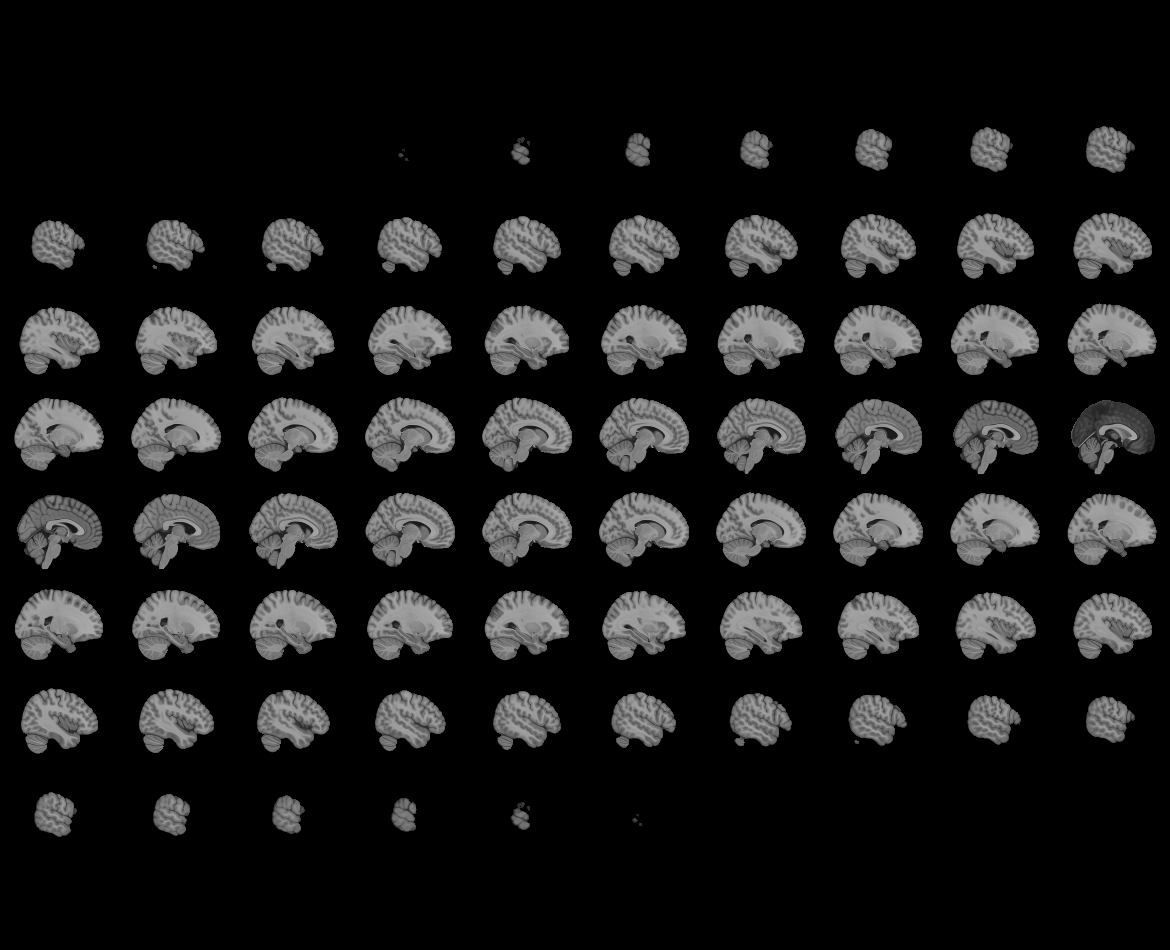
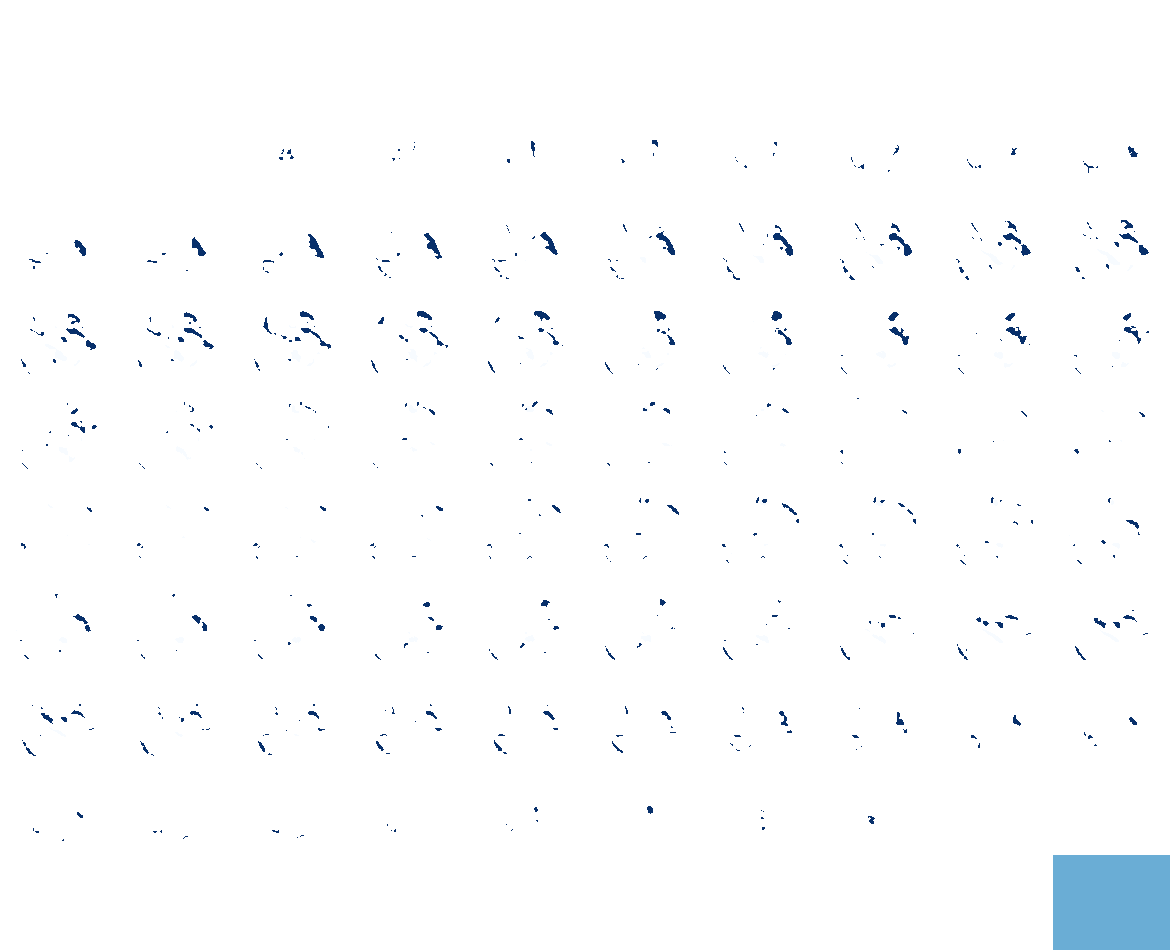

In [84]:
#Display new seed
html_img

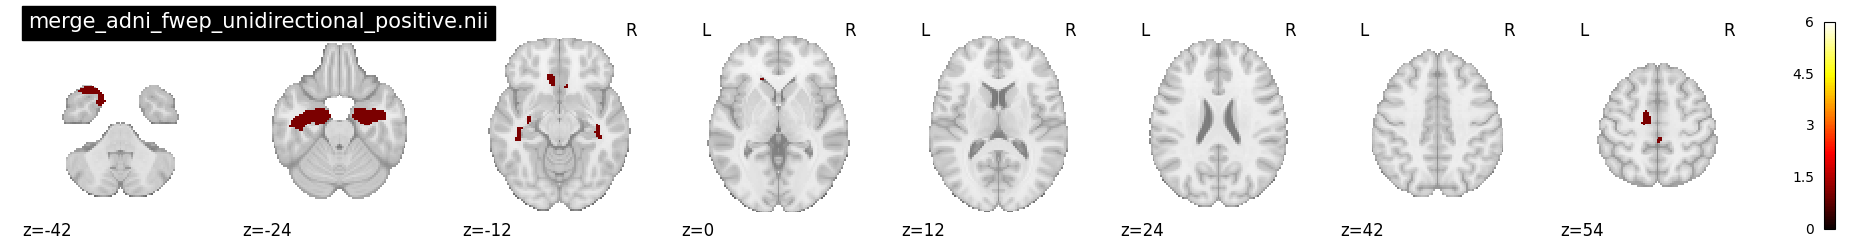

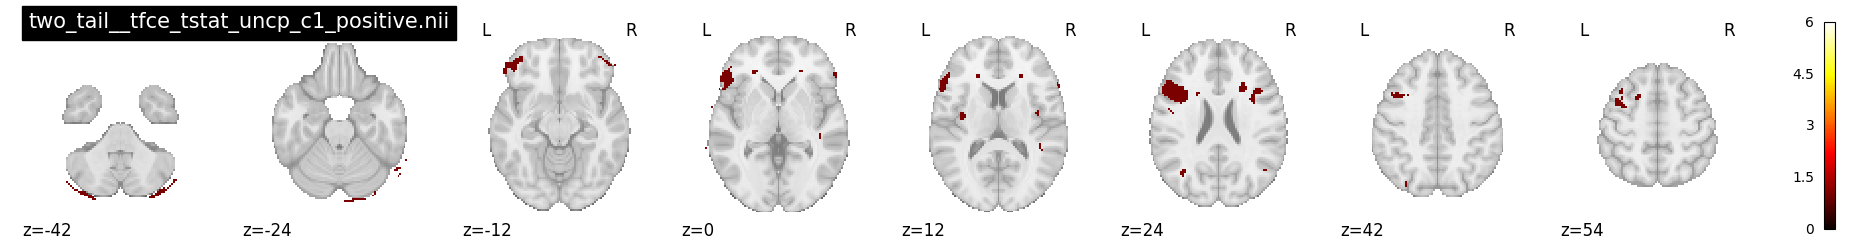

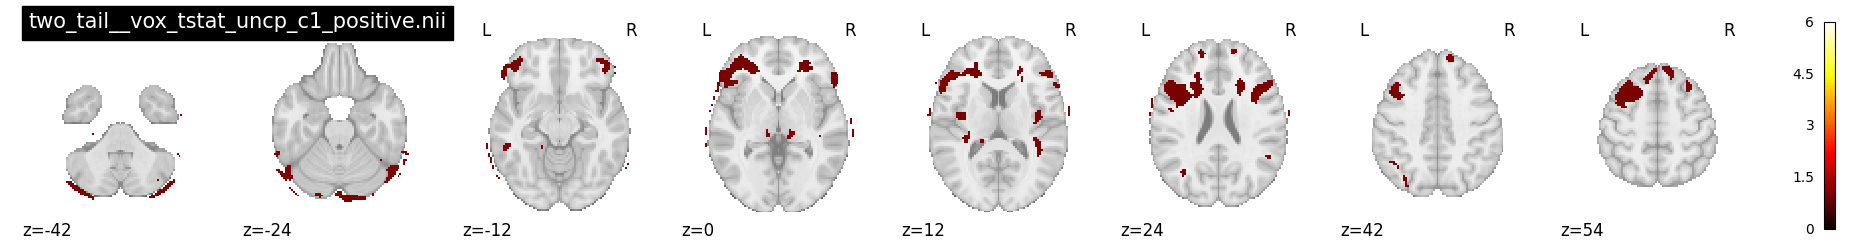

In [85]:
files = {}
for index, data in paths_df.iterrows():
    path = data.values[0]
    matrix = seed_matrices[path]
    matrix_img = image.new_img_like(mask, matrix)
    files[path] = matrix_img
    plotting.plot_stat_map(matrix_img, display_mode="z", cut_coords=[-42,-24,-12,0,12,24,42,54], cmap="cold_hot", colorbar=True,title=os.path.basename(path), vmax=6)


In [86]:
#Save the files

out_dir = r"C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\functional_networks\seeds"
html_dir = r"C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\functional_networks\html_networks"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

seed_img.to_filename(os.path.join(out_dir, name))
html_img.save_as_html(os.path.join(html_dir, name + '.html'))
